## Importing Necessary Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from collections import Counter
from sklearn.metrics import confusion_matrix , classification_report
import warnings
warnings.filterwarnings('ignore')

## Data Collection and Analysis

Pima Indians Diabetes Database : https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

In [2]:
diabetes_df = pd.read_csv("/content/drive/MyDrive/DataSets/diabetes.csv")

In [3]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes_df.shape

(768, 9)

In [5]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
diabetes_df.duplicated().sum()

0

In [9]:
diabetes_df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

0 - Non-Diabetic

1 - Diabetic

In [10]:
diabetes_df.groupby("Outcome").mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


## Data Visulization

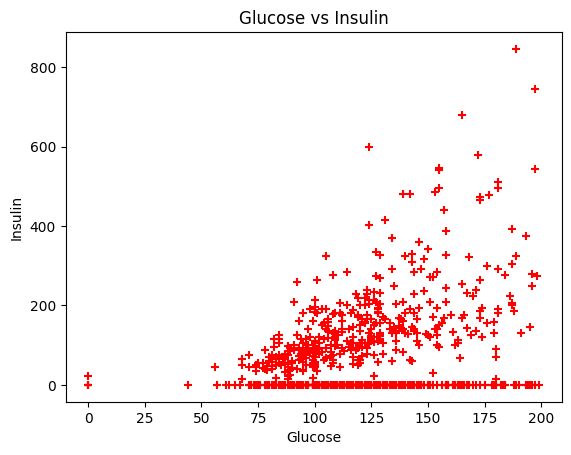

In [11]:
gluco = diabetes_df.Glucose
insul = diabetes_df.Insulin
plt.scatter(gluco, insul,marker="+",color="Red")
plt.xlabel('Glucose')
plt.ylabel('Insulin')
plt.title('Glucose vs Insulin')
plt.show()

<Axes: xlabel='Outcome', ylabel='Age'>

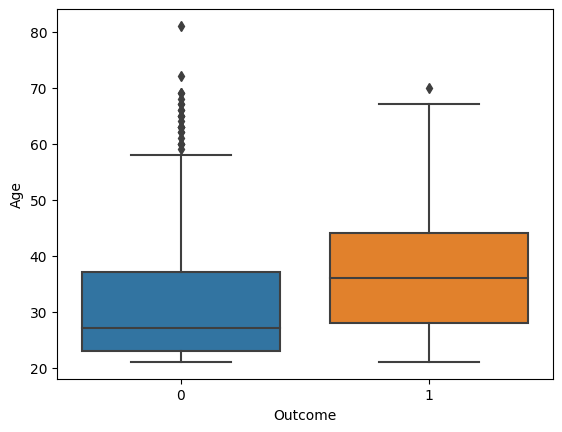

In [12]:
sns.boxplot(x="Outcome", y="Age", data=diabetes_df)

<Axes: xlabel='Outcome', ylabel='count'>

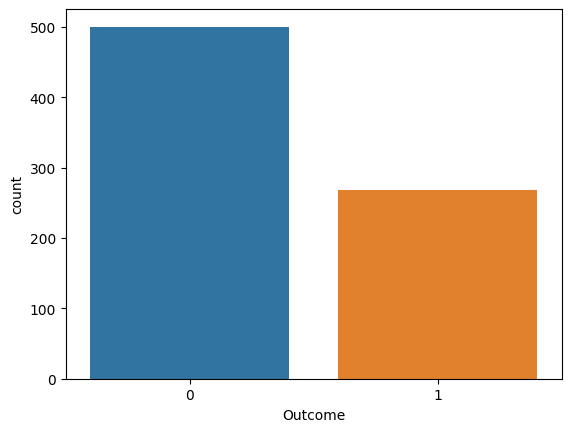

In [13]:
sns.countplot(x="Outcome",data=diabetes_df)

<Axes: xlabel='Glucose', ylabel='Insulin'>

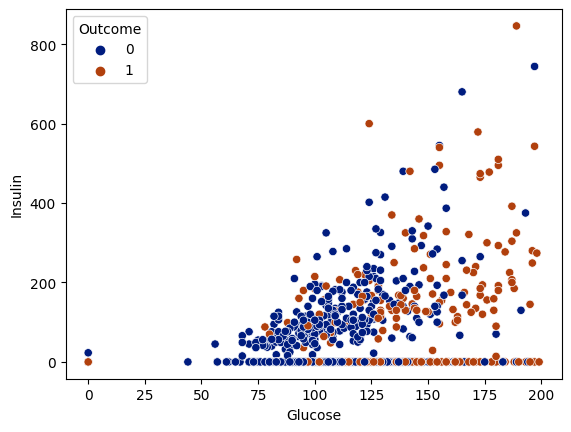

In [14]:
sns.scatterplot(data=diabetes_df,x='Glucose',y='Insulin',hue='Outcome',palette='dark')

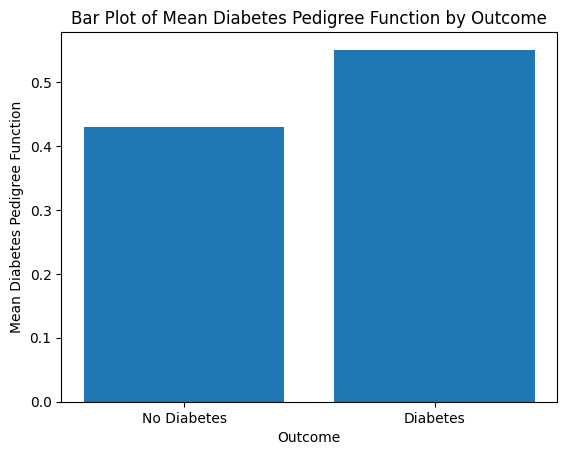

In [15]:
grouped = diabetes_df.groupby('Outcome')['DiabetesPedigreeFunction'].mean()

plt.bar(grouped.index, grouped.values)
plt.xlabel('Outcome')
plt.ylabel('Mean Diabetes Pedigree Function')
plt.title('Bar Plot of Mean Diabetes Pedigree Function by Outcome')
plt.xticks(grouped.index, ['No Diabetes', 'Diabetes'])
plt.show()

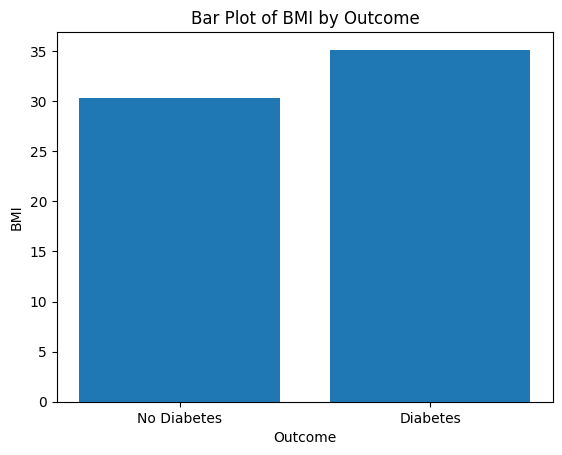

In [16]:
grouped = diabetes_df.groupby('Outcome')['BMI'].mean()

plt.bar(grouped.index, grouped.values)
plt.xlabel('Outcome')
plt.ylabel('BMI')
plt.title('Bar Plot of BMI by Outcome')
plt.xticks(grouped.index, ['No Diabetes', 'Diabetes'])
plt.show()

<Axes: xlabel='Outcome', ylabel='BMI'>

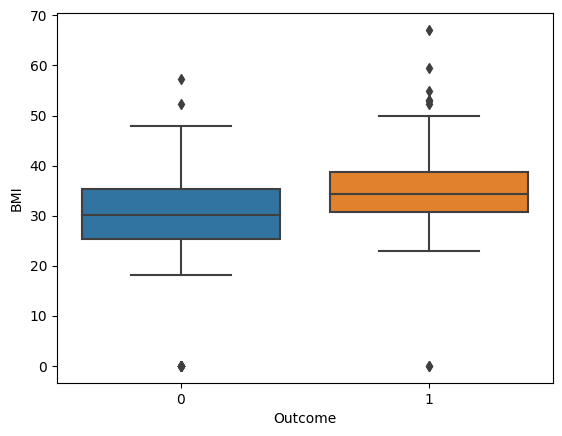

In [17]:
sns.boxplot(data=diabetes_df,x="Outcome",y="BMI")

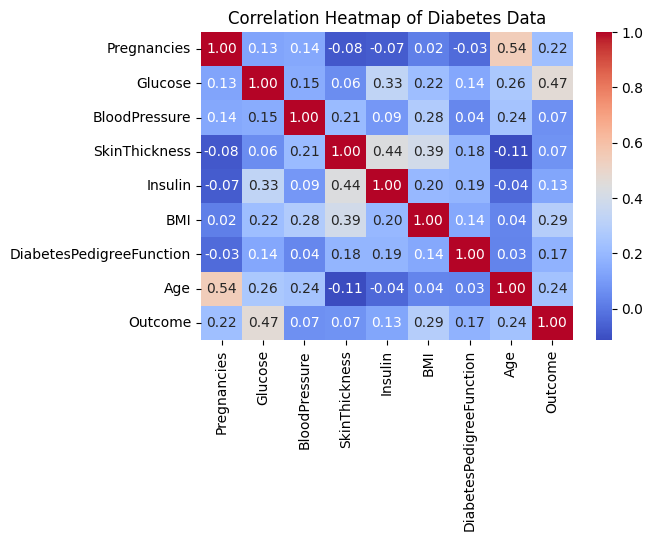

In [18]:
plt.figure(figsize=(6, 4))
sns.heatmap(diabetes_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap of Diabetes Data")
plt.show()

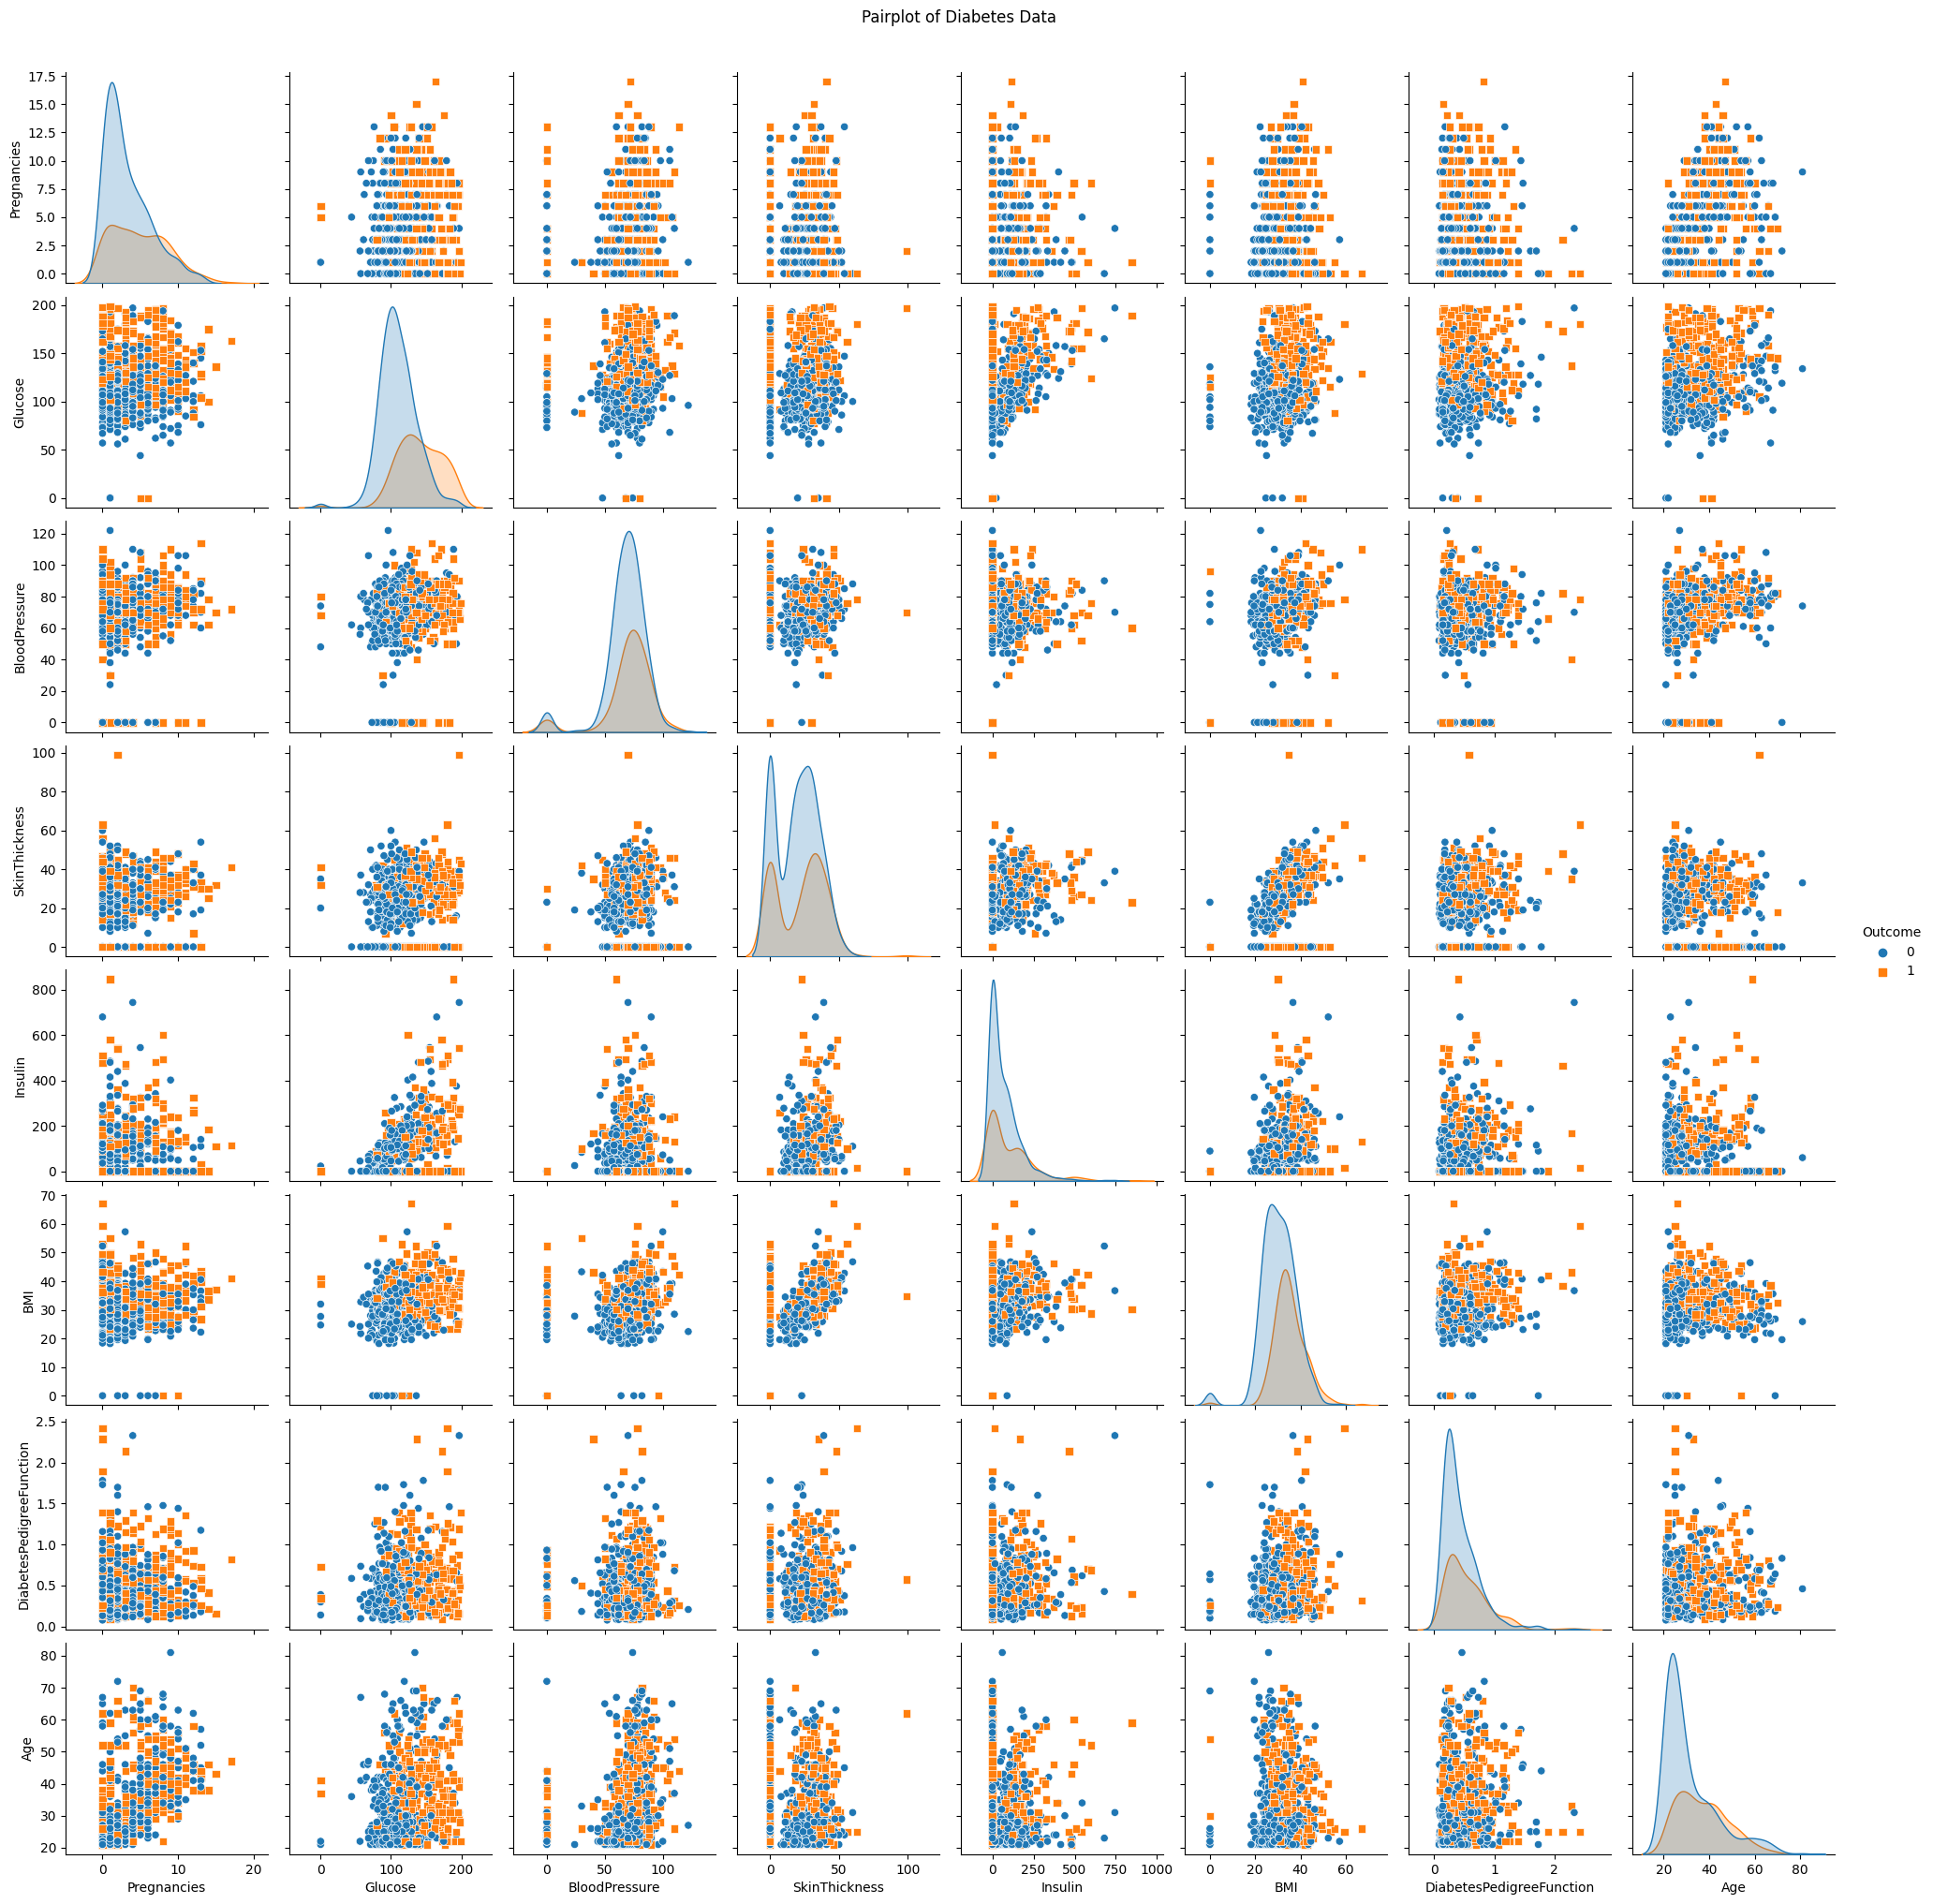

In [19]:
# Pairplot (scatter plot matrix) to visualize relationships between variables
sns.pairplot(diabetes_df, hue='Outcome', markers=["o", "s"])          # o - 0 , s - 1
plt.suptitle("Pairplot of Diabetes Data", y=1.02)   # y - vertical alingment position
plt.show()

## Data Pre- Processing

In [20]:
zero_rows_count = diabetes_df[diabetes_df == 0].count()
print(zero_rows_count)

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [21]:
# Imputing zero Values with Mean Values
columns_to_impute = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
imputer = SimpleImputer(missing_values=0, strategy='mean')
diabetes_df[columns_to_impute] = imputer.fit_transform(diabetes_df[columns_to_impute])
zero_rows_count = diabetes_df[diabetes_df == 0].count()
print(zero_rows_count)

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [22]:
i = diabetes_df.drop(columns="Outcome",axis=1)
d = diabetes_df["Outcome"]

In [23]:
i

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.000000,148.0,72.0,35.00000,155.548223,33.6,0.627,50
1,1.000000,85.0,66.0,29.00000,155.548223,26.6,0.351,31
2,8.000000,183.0,64.0,29.15342,155.548223,23.3,0.672,32
3,1.000000,89.0,66.0,23.00000,94.000000,28.1,0.167,21
4,4.494673,137.0,40.0,35.00000,168.000000,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10.000000,101.0,76.0,48.00000,180.000000,32.9,0.171,63
764,2.000000,122.0,70.0,27.00000,155.548223,36.8,0.340,27
765,5.000000,121.0,72.0,23.00000,112.000000,26.2,0.245,30
766,1.000000,126.0,60.0,29.15342,155.548223,30.1,0.349,47


In [24]:
d

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

## Feature scaling

In [25]:
std = StandardScaler()
std.fit(i)
std_data= std.transform(i)
print(std_data)

[[ 0.50625491  0.86510807 -0.03351824 ...  0.16629174  0.46849198
   1.4259954 ]
 [-1.17528945 -1.20616153 -0.52985903 ... -0.85253118 -0.36506078
  -0.19067191]
 [ 1.17887265  2.0158134  -0.69530596 ... -1.33283341  0.60439732
  -0.10558415]
 ...
 [ 0.16994604 -0.0225789  -0.03351824 ... -0.91074963 -0.68519336
  -0.27575966]
 [-1.17528945  0.14180757 -1.02619983 ... -0.34311972 -0.37110101
   1.17073215]
 [-1.17528945 -0.94314317 -0.19896517 ... -0.29945588 -0.47378505
  -0.87137393]]


In [26]:
i = std_data

In [27]:
print(i)
print(d)

[[ 0.50625491  0.86510807 -0.03351824 ...  0.16629174  0.46849198
   1.4259954 ]
 [-1.17528945 -1.20616153 -0.52985903 ... -0.85253118 -0.36506078
  -0.19067191]
 [ 1.17887265  2.0158134  -0.69530596 ... -1.33283341  0.60439732
  -0.10558415]
 ...
 [ 0.16994604 -0.0225789  -0.03351824 ... -0.91074963 -0.68519336
  -0.27575966]
 [-1.17528945  0.14180757 -1.02619983 ... -0.34311972 -0.37110101
   1.17073215]
 [-1.17528945 -0.94314317 -0.19896517 ... -0.29945588 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [28]:
i_train,i_test,d_train,d_test = train_test_split(i,d,test_size=0.2,stratify=d, random_state=10)

In [29]:
print(i_train.shape,d_train.shape,i_test.shape,d_test.shape)

(614, 8) (614,) (154, 8) (154,)


## Accuracy Score for Different Model

In [30]:
svc_obj = svm.SVC()
svc_obj.fit(i_train,d_train)
print("SVC model accuracy ")
svc_obj.score(i_test,d_test)

SVC model accuracy 


0.7727272727272727

In [31]:
ran_obj = RandomForestClassifier()
ran_obj.fit(i_train,d_train)
print("Random Forest Classifier accuracy")
ran_obj.score(i_test,d_test)

Random Forest Classifier accuracy


0.7792207792207793

In [32]:
nb_classifier = GaussianNB()
nb_classifier.fit(i_train, d_train)
print("Naive Bayes classifier accuracy")
nb_classifier.score(i_test,d_test)

Naive Bayes classifier accuracy


0.7662337662337663

In [33]:
dt_obj = DecisionTreeClassifier()
dt_obj.fit(i_train,d_train)
print("Decision Tree Classifier accuracy")
dt_obj.score(i_test,d_test)

Decision Tree Classifier accuracy


0.7207792207792207

In [34]:
logreg_obj = LogisticRegression()
logreg_obj.fit(i_train,d_train)
print("Logistic Regression accuracy")
logreg_obj.score(i_test,d_test)

Logistic Regression accuracy


0.8246753246753247

## Logistic **Regression**

## Finding best Parameter for Logistic **Regression**

# Hyper Parameters of Logistic Regression

1) **penalty:** The penalty parameter specifies the type of regularization penalty to be applied in the logistic regression model. Regularization is used to prevent overfitting. It can take two values:

* 'l1': L1 regularization, also known as Lasso regularization, adds the absolute values of the coefficients as a penalty term to the loss function. This can result in sparse models with some coefficients set to exactly zero.
* 'l2': L2 regularization, also known as Ridge regularization, adds the squared values of the coefficients as a penalty term. It encourages smaller coefficients but doesn't force them to be exactly zero.


2) **C:** The C parameter is the inverse of the regularization strength. It controls the trade-off between fitting the training data well and preventing overfitting. Smaller values of C increase the regularization strength, while larger values decrease it. Common choices for C include values like 0.001, 0.01, 0.1, 1.0, and 10.0.

3) **solver:** The solver parameter specifies the algorithm to use for optimizing the logistic regression model's objective function. Different solvers have different computational characteristics and are suited to different types of problems. Common choices include:

* 'liblinear': A good choice for small datasets and binary classification problems. It supports both L1 and L2 regularization.
* 'newton-cg', 'lbfgs', 'sag', 'saga': These solvers are suitable for multiclass problems and tend to be efficient for large datasets. They also support both L1 and L2 regularization.

4) **max_iter:** The max_iter parameter specifies the maximum number of iterations (or epochs) the solver should use to converge to a solution. If the algorithm doesn't converge within this number of iterations, it will stop. The appropriate value for max_iter depends on the convergence behavior of the chosen solver and the complexity of the dataset.



In [35]:
logistic_regression = LogisticRegression()
parameter = {
    'penalty': ['l1', 'l2'],  # Regularization penalty ('l1' or 'l2')
    'C': [0.001, 0.01, 0.1, 1.0, 10.0],  # Inverse of regularization strength
    'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'],  # Solver algorithm
    'max_iter': [100, 500, 1000]  # Maximum number of iterations
}
classifier_log = GridSearchCV(logistic_regression,parameter ,cv=5)
classifier_log.fit(i,d)
print("Best Parameter :",classifier_log.best_params_)

Best Parameter : {'C': 1.0, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}


## Model Building and Prediction

In [36]:
logistic_regression = LogisticRegression(C=1.0,max_iter=100,penalty='l2',solver='liblinear')

In [37]:
logistic_regression.fit(i_train, d_train)

LogisticRegression(solver='liblinear')

In [38]:
predicted = logistic_regression.predict(i_test)

In [39]:
print(predicted)

[0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 0 1 0 1 1 1 1 0 1 0 0 1
 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 1 1 0
 1 0 1 0 1 1 1 1 1 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 1 0 1 0 0 0 1 1 1 0 0
 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0
 0 0 1 0 0 0]


In [40]:
print(d_test)

194    0
350    0
738    0
629    0
6      1
      ..
486    0
339    1
457    0
504    0
623    0
Name: Outcome, Length: 154, dtype: int64


In [41]:
predicted_counts = Counter(predicted)
count_of_zeros = predicted_counts[0]
count_of_ones = predicted_counts[1]
print("Predicted Count of 0's:", count_of_zeros)
print("Predicted Count of 1's:", count_of_ones)

Predicted Count of 0's: 103
Predicted Count of 1's: 51


In [42]:
Actual_counts = Counter(d_test)
count_of_zeros = Actual_counts[0]
count_of_ones = Actual_counts[1]
print("Actual Count of 0's:", count_of_zeros)
print("Actual Count of 1's:", count_of_ones)

Actual Count of 0's: 100
Actual Count of 1's: 54


## Calculating accuracy

In [43]:
model_accuracy = accuracy_score(predicted,d_test)

In [44]:
model_accuracy

0.8246753246753247

# Performance Metrics

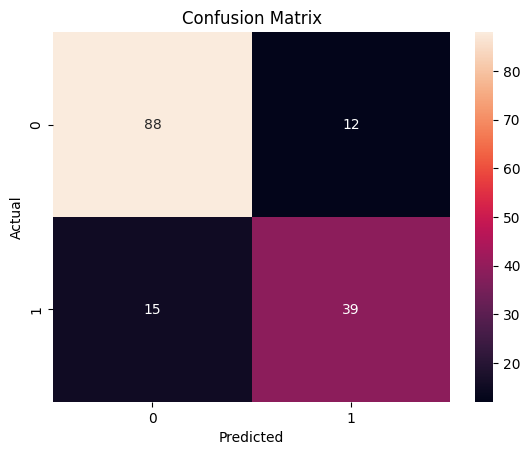

In [45]:
cf_matrix = confusion_matrix(d_test,predicted)
sns.heatmap(cf_matrix,annot=True)
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Confusion Matrix")
plt.show()

In [46]:
print(classification_report(d_test,predicted))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87       100
           1       0.76      0.72      0.74        54

    accuracy                           0.82       154
   macro avg       0.81      0.80      0.80       154
weighted avg       0.82      0.82      0.82       154



**Precision:**

Precision measures the accuracy of positive predictions made by a classification model.
It is calculated as the ratio of true positives (correctly predicted positive instances) to the sum of true positives and false positives (incorrectly predicted positive instances).
Precision focuses on the quality of positive predictions and answers the question, "Of all the instances predicted as positive, how many were actually positive?"

**Recall:**

Recall, also known as sensitivity or true positive rate, measures the ability of a model to capture all the positive instances in the dataset.
It is calculated as the ratio of true positives to the sum of true positives and false negatives (positive instances incorrectly predicted as negative).
Recall focuses on the completeness of positive predictions and answers the question, "Of all the actual positive instances, how many were correctly predicted as positive?"


**F1-Score:**

The F1-score is the harmonic mean of precision and recall.
It provides a single metric that balances both precision and recall.
The F1-score is particularly useful when you want to find a balance between making accurate positive predictions (high precision) and capturing all positive instances (high recall).
It is calculated as 2 times the product of precision and recall divided by the sum of precision and recall: F1 = 2 * (precision * recall) / (precision + recall).



**Support:**

Support represents the number of instances in each class in the dataset.
It can be seen as the number of true instances for each class.
Support is often used to provide context for precision, recall, and F1-score, especially when dealing with imbalanced datasets where the number of instances in different classes varies significantly.

## Predictive System

In [47]:
new_data = (0,137,40,35,168,43.1,2.288,33)

input_array = np.asarray(new_data)

data_reshape = input_array.reshape(1,-1)  # 1 row 8 column

std_input = std.transform(data_reshape)

prd = logistic_regression.predict(std_input)

if (prd[0]==0):
  print("The Person is not diabetic")
else:
  print("The Person is diabetic")

The Person is diabetic


In [48]:
import joblib

In [49]:
joblib.dump(logistic_regression,'log_model.joblib')

['log_model.joblib']

In [50]:
joblib.dump(std,'std.joblib')

['std.joblib']